## **Description**
Learn word vector embeddings on python library dependencies data then visualize their t-SNE reduction. It can be observed that the vectors assemble into a hierarchical structure where more core and general purpose packages find themselves closer to the tail and the more niche packages closer to the head. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import warnings
warnings.warn = lambda *x, **y: ...

In [2]:
def vectorized_dataframe(corpus, mass, vector_size=30, min_count=5):
	model = Word2Vec(
		sentences=corpus,
		vector_size=vector_size,
		window=1,
		min_count=min_count,
		workers=4
	)
	for k in ["matplotlib", "django", "numpy"]:
		print ('KEY:', k)
		for k0, v in model.wv.most_similar(k, topn=5):
			print ('   ', v, k0)
		print ()

	wv = model.wv
	data = [ [v, mass[v], *wv[v]] for v in wv.index_to_key ]
	return pd.DataFrame(data, columns=["word", "mass", *list(range(model.vector_size))])

In [3]:
def PCA(df):
	# Computing the correlation matrix
	X_corr = df.corr()

	# Computing eigen values and eigen vectors
	values, vectors = np.linalg.eig(X_corr)

	# Sorting the eigen vectors coresponding to eigen values in descending order
	args = (-values).argsort()
	values = vectors[args]
	vectors = vectors[:, args]

	# Taking first 2 components which explain maximum variance for projecting
	new_vectors = vectors[:,:2]

	# Projecting it onto new dimesion with 2 axis
	neww_X = np.dot(df, new_vectors)
	return pd.DataFrame(neww_X)

In [4]:
def tsne_df(df, seed = 0):
	df = df.copy()
	tsne = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=seed)
	t = tsne.fit_transform(df.loc[:, (df.columns != 'word') & (df.columns != 'mass')])
	return pd.concat([df[['word', 'mass']], pd.DataFrame(t)], axis=1)

In [5]:
def scatterplot(df, cmap='icefire', font_family='serif', font_color='orange', scale=0.66):
    mass = np.log10(df['mass'])
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(11.7*scale, 8.27*scale)})
    s = sns.scatterplot(
        x=0, y=1,
        hue=mass,
        palette=cmap,
        data=df,
        legend=False,
        alpha=0.3,
        size=mass
    )
    s.set(
        xticklabels=[],
        yticklabels=[],
        xlabel=None,
        ylabel=None
    )

    font = {
        'family': font_family,
        'color':  font_color,
        'weight': 'bold',
        'size': 10,
    }

    sample = pd.concat([
        df.sample(12, weights=mass),
        df.nlargest(columns='mass', n=4)
    ], axis=0)

    for i, row in sample.iterrows():
        word, count, x, y = row
        plt.text(x, y, word, font)
    return s

## Data processing

In [6]:
corpus = []
mass = defaultdict(int)
for line in open('dependencies.csv'):
	try:
		package, requirement, package_name, package_version = line.split(',')
		if requirement:
			print(requirement, '->', package_name)
			corpus.append([requirement, package_name])
			mass[requirement] += 1	
			mass[package_name] += 1	
	except ValueError:
		...

requirement -> package_name
beautifulsoup4 -> 115wangpan
homura -> 115wangpan
humanize -> 115wangpan
pycurl -> 115wangpan
pysocks -> 115wangpan
requests -> 115wangpan
six -> 115wangpan
django -> 199Fix
docopt -> 2factorcli
onetimepass -> 2factorcli
python-gnupg -> 2factorcli
docutils -> 2lazy2rest
envoy -> 2mp3
bitcoin -> 3d-wallet-generator
pyqrcode -> 3d-wallet-generator
dpkt -> 3xsd
gevent -> 3xsd
psutil -> 3xsd
pycrypto -> 3xsd
pysendfile -> 3xsd
python-pytun -> 3xsd
pyudt4 -> 3xsd
setproctitle -> 3xsd
distribute -> 73.unlockItems
lxml -> 9ML
ply -> 9ML
acos-client -> a10-neutron-lbaas
a10-neutron-lbaas -> a10-openstack-lbaas
appdirs -> a2svm
argparse -> a2svm
argparse -> a8
logbook -> a8
psutil -> a8
pygtkhelpers -> a8
pyyaml -> a8
jinja2 -> aam
mistune -> aam
parguments -> aam
pygments -> aam
pika -> aamnotifs
nose -> abakaffe-cli
simplejson -> abakaffe-cli
requests -> AbakaffeNotifier
tkinter -> abalone
pyld -> abb
rdflib -> abb
sparqltools -> abb
tornado -> abb
scipy -> ABBA
di

## Data visualizations

In [7]:
df = vectorized_dataframe(corpus, mass, vector_size=50, min_count=16)

KEY: matplotlib
    0.9904288053512573 zope.component
    0.9900931119918823 oslotest
    0.9899616837501526 python-subunit
    0.9899536371231079 coverage
    0.9899269342422485 pep8

KEY: django
    0.9811201095581055 webob
    0.980758786201477 markupsafe
    0.980540931224823 hacking
    0.9801552295684814 oslo.messaging
    0.9801007509231567 babel

KEY: numpy
    0.9913159012794495 fixtures
    0.9912455677986145 coverage
    0.9907140731811523 testscenarios
    0.9904708862304688 sphinx
    0.9904292225837708 pbr



<AxesSubplot:>

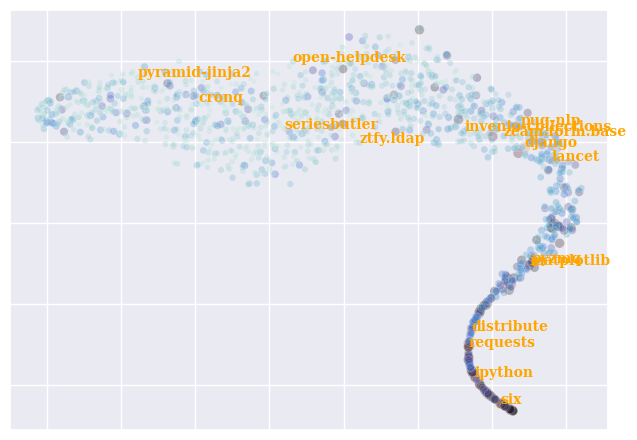

In [8]:
scatterplot(tsne_df(df, 1), cmap="icefire")

<AxesSubplot:>

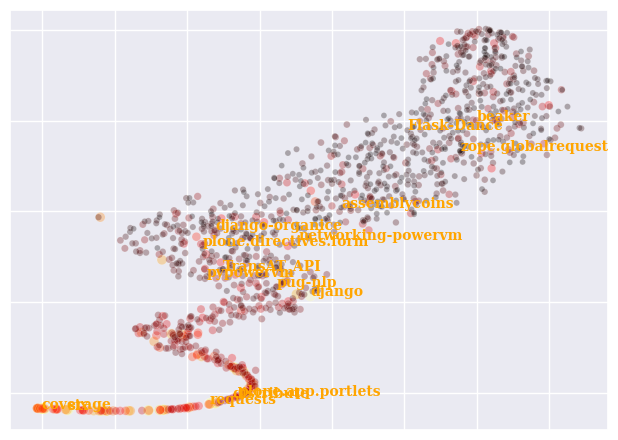

In [9]:
scatterplot(tsne_df(df, 2), cmap="hot")

<AxesSubplot:>

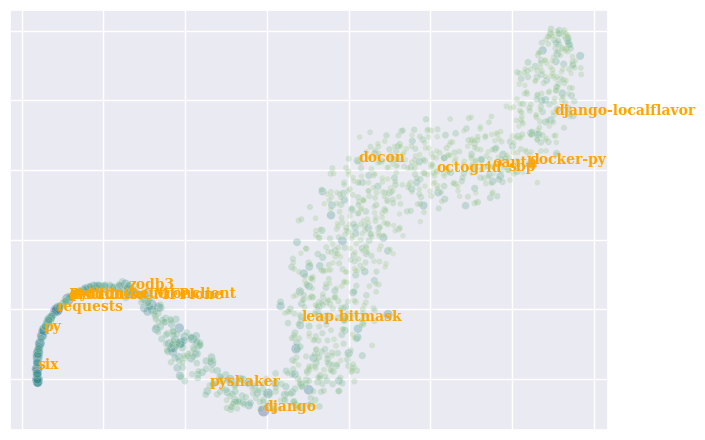

In [10]:
scatterplot(tsne_df(df, 3), cmap="crest")

<AxesSubplot:>

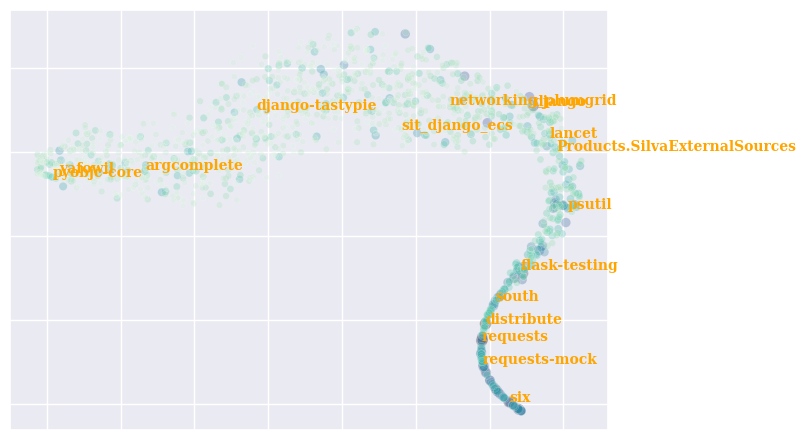

In [11]:
scatterplot(tsne_df(df, 4), cmap="mako_r")

<AxesSubplot:>

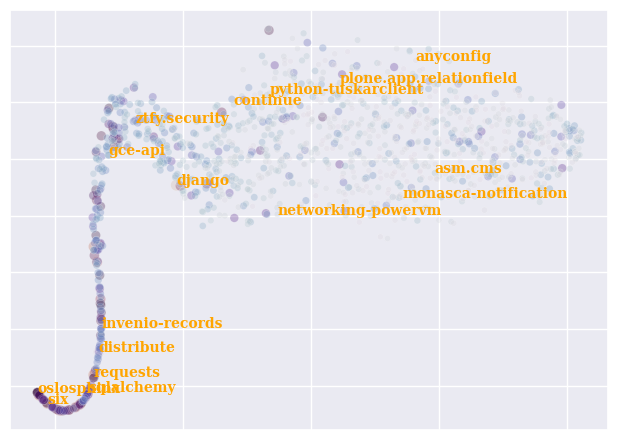

In [12]:
scatterplot(tsne_df(df, 5), cmap="twilight")

<AxesSubplot:>

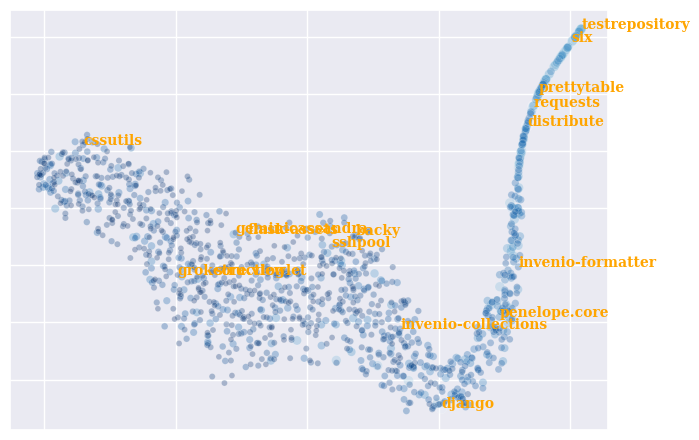

In [13]:
scatterplot(tsne_df(df, 6), cmap="Blues_r")

<AxesSubplot:>

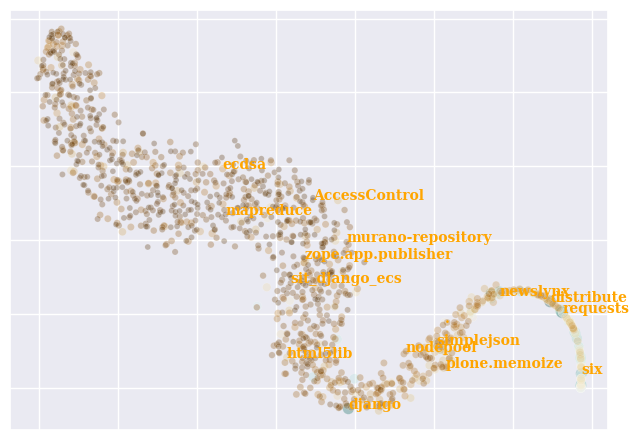

In [14]:
scatterplot(tsne_df(df, 7), cmap="BrBG")

<AxesSubplot:>

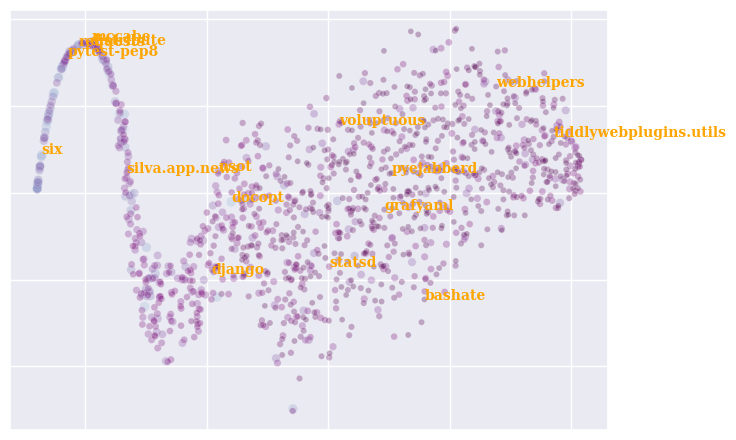

In [15]:
scatterplot(tsne_df(df, 8), cmap="BuPu_r")

<AxesSubplot:>

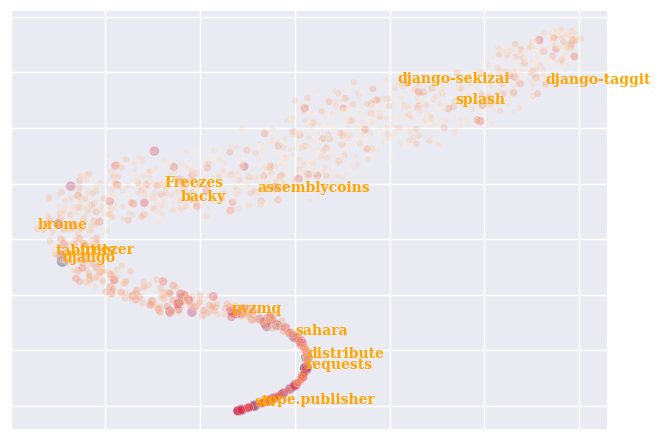

In [16]:
scatterplot(tsne_df(df, 9), cmap="rocket_r")

<AxesSubplot:>

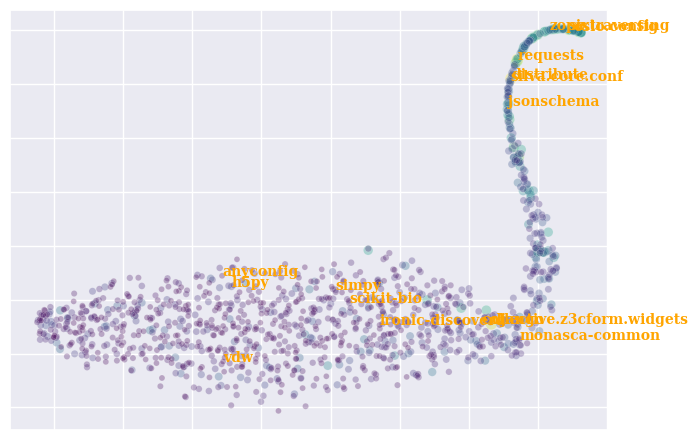

In [17]:
scatterplot(tsne_df(df, 10), cmap="viridis")

<AxesSubplot:>

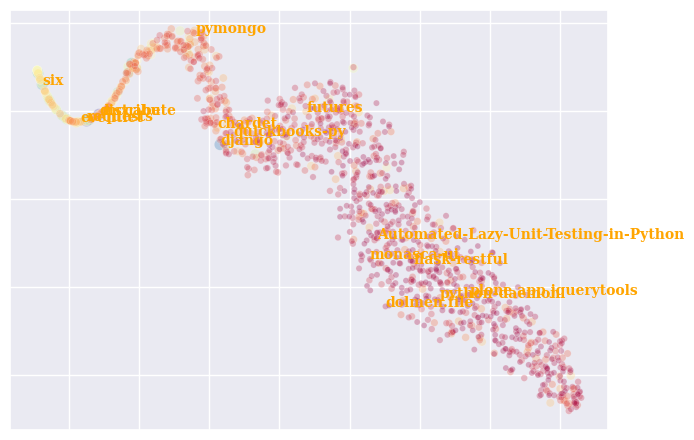

In [18]:
scatterplot(tsne_df(df, 11), cmap="Spectral")

<AxesSubplot:>

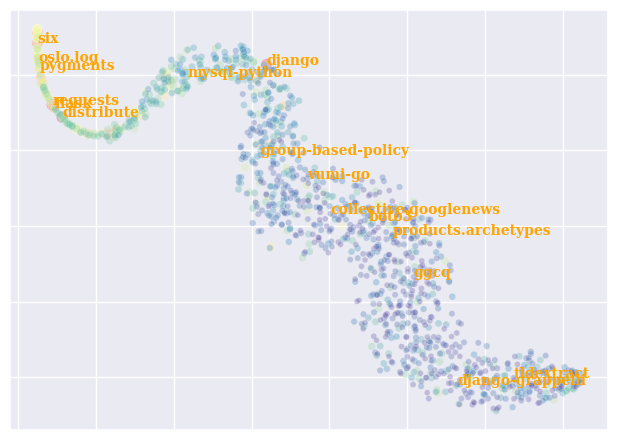

In [19]:
scatterplot(tsne_df(df, 12), cmap="Spectral_r")

<AxesSubplot:>

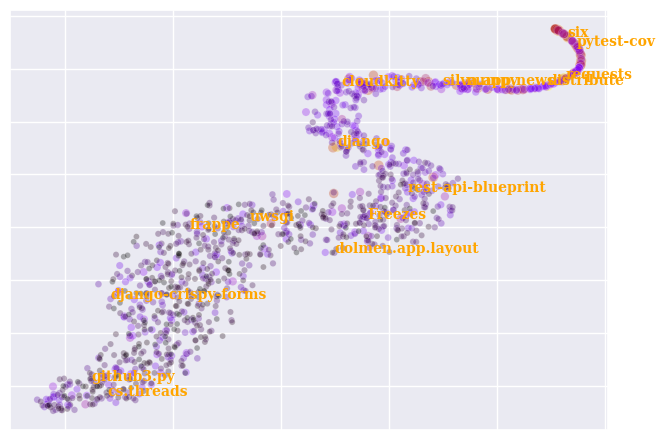

In [20]:
scatterplot(tsne_df(df, 13), cmap="gnuplot")

<AxesSubplot:>

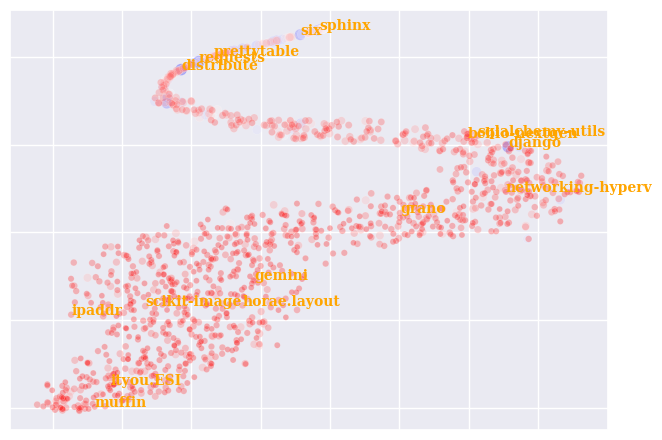

In [21]:
scatterplot(tsne_df(df, 14), cmap="bwr_r")

<AxesSubplot:>

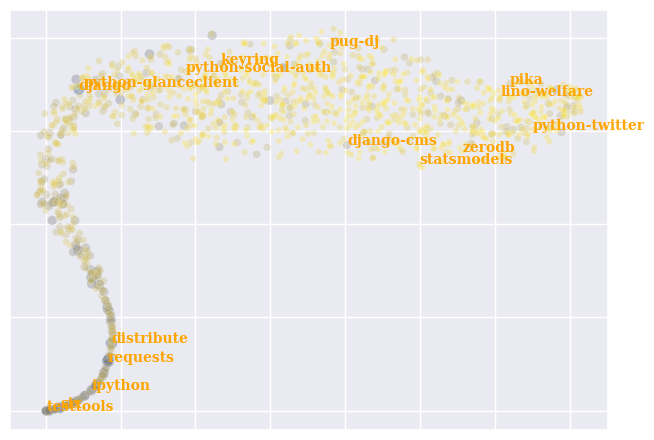

In [22]:
scatterplot(tsne_df(df, 15), cmap="cividis_r")

<AxesSubplot:>

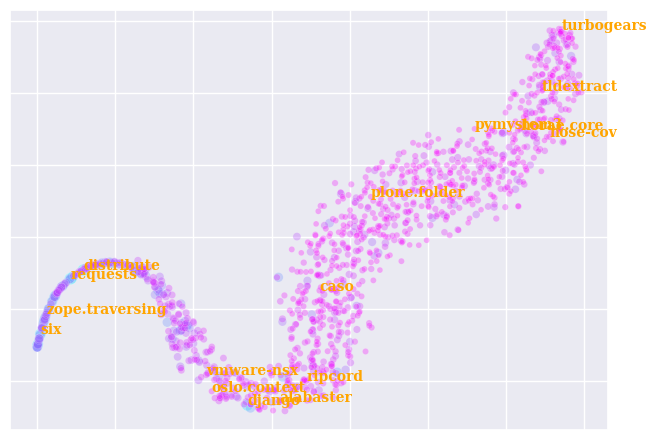

In [23]:
scatterplot(tsne_df(df, 16), cmap="cool_r")

<AxesSubplot:>

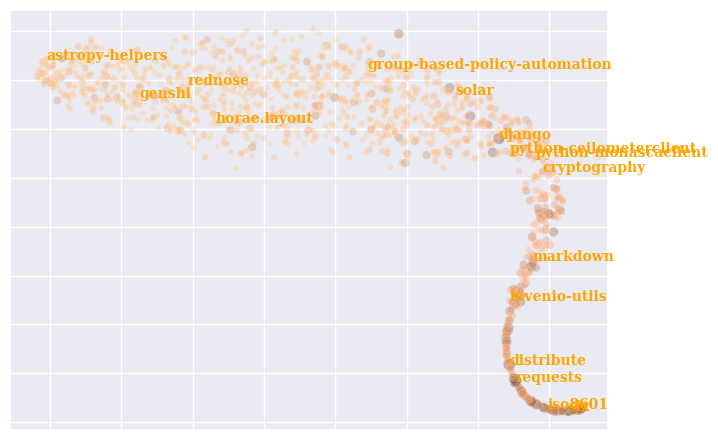

In [24]:
scatterplot(tsne_df(df, 17), cmap="copper_r")

<AxesSubplot:>

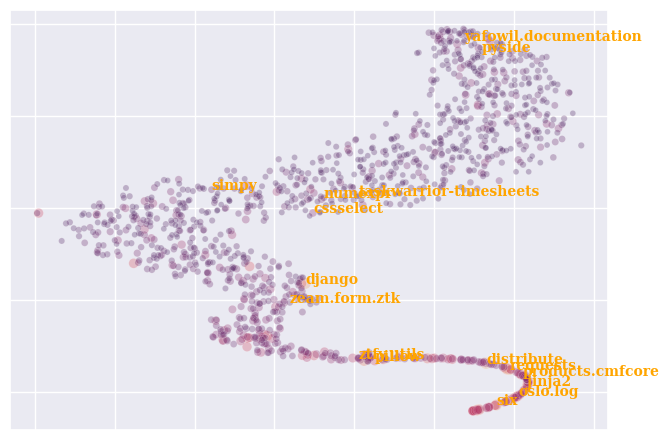

In [25]:
scatterplot(tsne_df(df, 18), cmap="flare_r")

<AxesSubplot:>

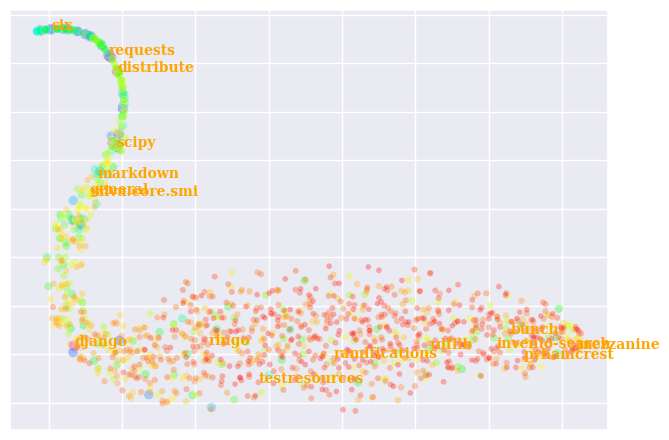

In [26]:
scatterplot(tsne_df(df, 19), cmap="hsv")

<AxesSubplot:>

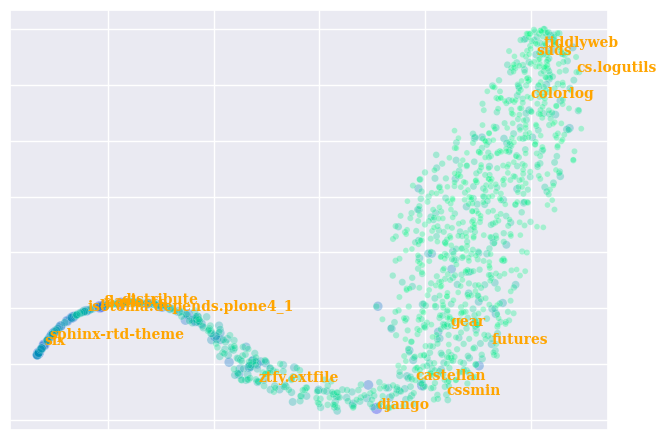

In [27]:
scatterplot(tsne_df(df, 20), cmap="winter_r")

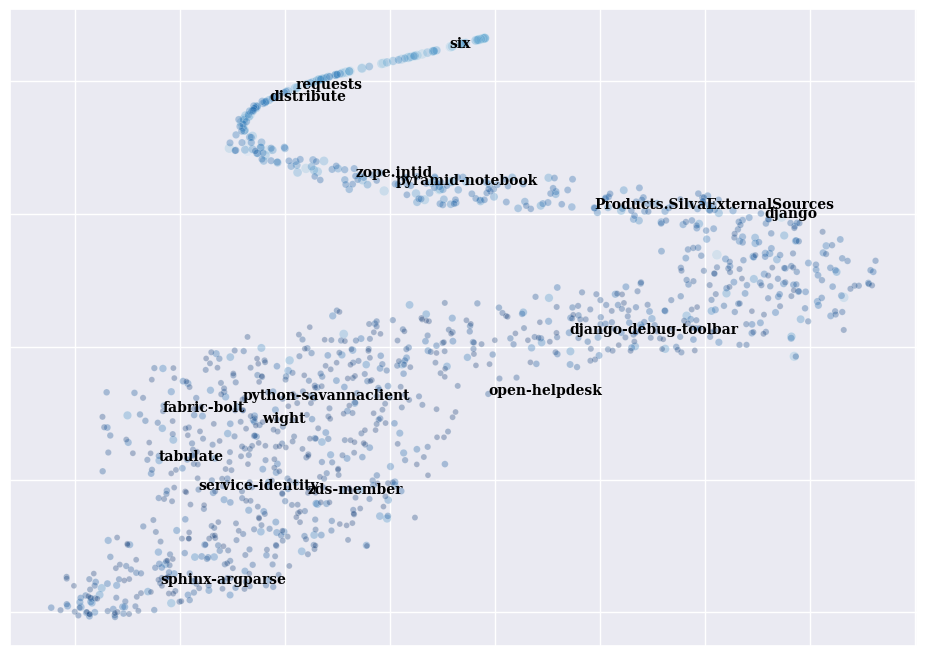

In [29]:
scatterplot(tsne_df(df, 14), cmap="Blues_r", font_color="black", scale=1.0).figure.savefig("tsne.png")